# 1.Importing data and libraries


Step 1 : loading libraries important for working wit and visualizing data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Step 2: importing dataset into pandas Dataframe

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 3: Checking for missing variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data set contains 38 categories containing numbers in either type float or integer and has 43 categories with text which is classified as type object **(subject to review)**.

In [5]:

def missing_cols(df):
    total = 0 
    for col in df.columns:
        missing_total = df[col].isnull().sum()
        total += missing_total
        if missing_total != 0:
            print(f"{col}=>{df[col].isnull().sum()}")

    if total == 0:
        print("No missing values")
    return total
missing_cols(data)

LotFrontage=>259
Alley=>1369
MasVnrType=>8
MasVnrArea=>8
BsmtQual=>37
BsmtCond=>37
BsmtExposure=>38
BsmtFinType1=>37
BsmtFinType2=>38
Electrical=>1
FireplaceQu=>690
GarageType=>81
GarageYrBlt=>81
GarageFinish=>81
GarageQual=>81
GarageCond=>81
PoolQC=>1453
Fence=>1179
MiscFeature=>1406


6965

In [6]:
def data_missing(df):
    for col in df.columns:
        pct = df[col].isnull().mean()*100
        if (pct!=0):
            print('{}=>{}%'.format(col,round(pct,2)))

data_missing(data)

LotFrontage=>17.74%
Alley=>93.77%
MasVnrType=>0.55%
MasVnrArea=>0.55%
BsmtQual=>2.53%
BsmtCond=>2.53%
BsmtExposure=>2.6%
BsmtFinType1=>2.53%
BsmtFinType2=>2.6%
Electrical=>0.07%
FireplaceQu=>47.26%
GarageType=>5.55%
GarageYrBlt=>5.55%
GarageFinish=>5.55%
GarageQual=>5.55%
GarageCond=>5.55%
PoolQC=>99.52%
Fence=>80.75%
MiscFeature=>96.3%


# 2 Data preparation

**Removing categories with more than 80% of data missing**

In [7]:
data.drop(['Alley', 'MiscFeature', 'Fence', 'PoolQC'], axis=1,inplace = True)

**Stliting the object columns and numerical conlums

In [8]:
object_columns_df = data.select_dtypes(include=['object'])
numerical_columns_df =data.select_dtypes(exclude=['object'])

In [9]:
def category_nulls(df):
    for col in df.columns:
        null_counts = df[col].isnull().sum()
        if(null_counts!=0):
            print(f"{col}=>{null_counts}")
        
category_nulls(object_columns_df)   

MasVnrType=>8
BsmtQual=>37
BsmtCond=>37
BsmtExposure=>38
BsmtFinType1=>37
BsmtFinType2=>38
Electrical=>1
FireplaceQu=>690
GarageType=>81
GarageFinish=>81
GarageQual=>81
GarageCond=>81


### Cleaning objects columns

Adding None to columns with a high count on none feature

In [10]:
collumn_Nulls = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']

object_columns_df[collumn_Nulls] = object_columns_df[collumn_Nulls].fillna('NA')


using mode variable in columns to fill in missing data

In [11]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']

object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [12]:
object_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [13]:
numerical_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [14]:
numeric_nulls = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(numeric_nulls))

Number of null values in each column:
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [15]:
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
69.0


In [16]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

In [17]:
# fill coloums with zero
numerical_columns_df= numerical_columns_df.fillna(0)


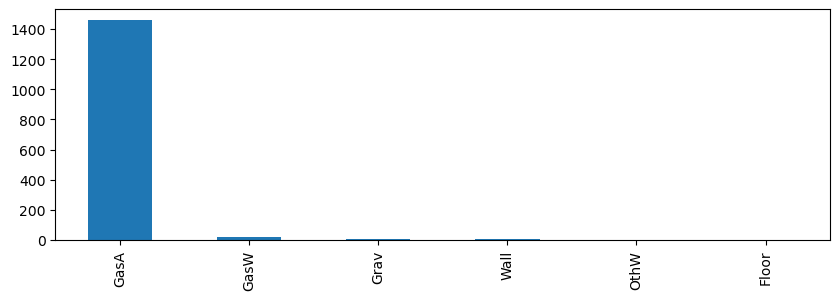

In [18]:
# data found low variance so it was deleted
object_columns_df['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Utilities'].value_counts() 

object_columns_df['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Street'].value_counts() 

object_columns_df['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Condition2'].value_counts() 

object_columns_df['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['RoofMatl'].value_counts() 

object_columns_df['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Heating'].value_counts()

object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [19]:
#creating new features

numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_House, dtype: float64

In [20]:
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House


In [21]:
# Encoding categorical features
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [22]:
# Hot encoding
rest_object_columns = object_columns_df.select_dtypes(include=['object'])

object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns) 
object_columns_df.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4.0,2.0,4.0,5.0,1.0,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2.0,4.0,2.0,5.0,1.0,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4.0,2.0,3.0,6.0,1.0,4,1,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Concating numerical and catagorial 
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House
0,3,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,61,0,0,0,0,0,2,2008,208500,5
1,3,2,2,4.0,2.0,4.0,5.0,1.0,4,1,...,0,0,0,0,0,0,5,2007,181500,31
2,2,4,2,4.0,2.0,2.0,6.0,1.0,4,1,...,42,0,0,0,0,0,9,2008,223500,7
3,2,2,2,2.0,4.0,2.0,5.0,1.0,4,1,...,35,272,0,0,0,0,2,2006,140000,91
4,2,4,2,4.0,2.0,3.0,6.0,1.0,4,1,...,84,0,0,0,0,0,12,2008,250000,8


# Spliting data

In [31]:
# get the locations
x = df_final.iloc[:, :-1]
y = df_final.iloc[:, -2]
 
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20 )

In [32]:
y_train

927     176000
299     158500
290     233230
1059    220000
361     145000
         ...  
610     313000
1375    239000
740     132000
891     172500
1215    125000
Name: SalePrice, Length: 1168, dtype: int64